In [1]:
#!pip install torch==1.9.1+cu111 torchaudio==0.9.1 -f https://download.pytorch.org/whl/torch_stable.html
#!pip install torch==1.9.1+cpu torchaudio==0.9.1 -f https://download.pytorch.org/whl/torch_stable.html
#!pip install torchaudio

In [86]:
#!pip install audtorch
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [87]:
import torch
import os
import torchaudio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import IPython.display as ipd
import random
import sklearn 

from IPython.display import clear_output
import tqdm.notebook as tqdm
from efficientnet_pytorch import EfficientNet
from efficientnet_pytorch.utils import Conv2dStaticSamePadding
from torch import nn
from sklearn.metrics import classification_report

import torch.nn.functional as F

#import audtorch
%matplotlib inline

In [88]:
from utils.dataloader import make_sorted_dataloader, collate_with_paddings
from utils.chunk_dataset import ChunkDataSet
from utils.zip_dataset import ZippedDataSet, ConcatDataset
from utils.chunk_augmented_dataset import ChunkAugDataSet
from utils.scan_data import scan_rootdir
import utils.load_data
from utils.load_data import load_anno_tensor, load_vad_df


In [89]:
!ls data/

Annotations_gold_standard-20220202T091454Z-001.zip
audio
audio-20220401T081010Z-001.zip
Data-20211102T111411Z-001.zip
Data-20211102T111411Z-002.zip
Data-20211102T111411Z-003.zip
ds_chunk2s.zip
ds_chunk400ms.zip
ds.zip
noises
NoXi_annotations_reliable_gold_standard_classification_with_additional_train_data
NoXi_annotations_reliable_gold_standard_classification_with_additional_train_data-20220322T103638Z-001.zip
trainds_chunk400ms_msl0.4.zip


In [90]:
#train_ds = 
chunk_sz=6
DATA_BASEDIR="data/NoXi_annotations_reliable_gold_standard_classification_with_additional_train_data/"

data={}
for d in os.listdir(DATA_BASEDIR):
    print(d)
    data[d] = {}
    for subset in ['dev', 'test', 'train']:
        print(subset)
        subset_dir = DATA_BASEDIR + f'/{d}/{subset}'
        data[d][subset] = ZippedDataSet(f'{subset_dir}/chunk{chunk_sz}s_msl0.zip', 
                         ChunkDataSet(subset_dir, chunk_size_s=chunk_sz, use_vad=False), 
                         rewrite=True, 
                         min_sample_len=0)
        
# train_ds = ZippedDataSet(f'{DATA_BASEDIR}/train_chunk{chunk_sz}s_msl0.zip', 
#                          ChunkDataSet(f'{DATA_BASEDIR}/train/', chunk_size_s=chunk_sz), 
#                          rewrite=False, 
#                          min_sample_len=0)
# dev_ds = ZippedDataSet(f'{DATA_BASEDIR}/dev_chunk{chunk_sz}s_msl0.zip', 
#                         ChunkDataSet(f'{DATA_BASEDIR}/dev', chunk_size_s=chunk_sz), 
#                         rewrite=True, 
#                         min_sample_len=0)
# test_ds = ZippedDataSet(f'{DATA_BASEDIR}/test_chunk{chunk_sz}s_msl0.zip', 
#                         ChunkDataSet(f'{DATA_BASEDIR}/test', chunk_size_s=chunk_sz), 
#                         rewrite=False, 
#                         min_sample_len=0)

English
dev
1632 chunks
generating data/NoXi_annotations_reliable_gold_standard_classification_with_additional_train_data//English/dev/chunk6s_msl0.zip.
Dataloader min_sample_len=0
SortedSampler remove 0 (1632 -> 1632)


  0%|          | 0/1632 [00:00<?, ?it/s]

test
1304 chunks
generating data/NoXi_annotations_reliable_gold_standard_classification_with_additional_train_data//English/test/chunk6s_msl0.zip.
Dataloader min_sample_len=0
SortedSampler remove 0 (1304 -> 1304)


  0%|          | 0/1304 [00:00<?, ?it/s]

train
Didn't find ANNO for data/NoXi_annotations_reliable_gold_standard_classification_with_additional_train_data//English/train/039_2016-04-07_Nottingham novice.
8082 chunks
generating data/NoXi_annotations_reliable_gold_standard_classification_with_additional_train_data//English/train/chunk6s_msl0.zip.
Dataloader min_sample_len=0
SortedSampler remove 0 (8082 -> 8082)


  0%|          | 0/8082 [00:00<?, ?it/s]

German
dev
5275 chunks
generating data/NoXi_annotations_reliable_gold_standard_classification_with_additional_train_data//German/dev/chunk6s_msl0.zip.
Dataloader min_sample_len=0
SortedSampler remove 0 (5275 -> 5275)


  0%|          | 0/5275 [00:00<?, ?it/s]

test
2268 chunks
generating data/NoXi_annotations_reliable_gold_standard_classification_with_additional_train_data//German/test/chunk6s_msl0.zip.
Dataloader min_sample_len=0
SortedSampler remove 0 (2268 -> 2268)


  0%|          | 0/2268 [00:00<?, ?it/s]

train
Didn't find ANNO for data/NoXi_annotations_reliable_gold_standard_classification_with_additional_train_data//German/train/073_2016-05-23_Augsburg novice.
Didn't find ANNO for data/NoXi_annotations_reliable_gold_standard_classification_with_additional_train_data//German/train/067_2016-05-23_Augsburg expert.
12040 chunks
generating data/NoXi_annotations_reliable_gold_standard_classification_with_additional_train_data//German/train/chunk6s_msl0.zip.
Dataloader min_sample_len=0
SortedSampler remove 0 (12040 -> 12040)


  0%|          | 0/12040 [00:00<?, ?it/s]

French
dev
9318 chunks
generating data/NoXi_annotations_reliable_gold_standard_classification_with_additional_train_data//French/dev/chunk6s_msl0.zip.
Dataloader min_sample_len=0
SortedSampler remove 0 (9318 -> 9318)


  0%|          | 0/9318 [00:00<?, ?it/s]

test
4518 chunks
generating data/NoXi_annotations_reliable_gold_standard_classification_with_additional_train_data//French/test/chunk6s_msl0.zip.
Dataloader min_sample_len=0
SortedSampler remove 0 (4518 -> 4518)


  0%|          | 0/4518 [00:00<?, ?it/s]

train
24759 chunks
generating data/NoXi_annotations_reliable_gold_standard_classification_with_additional_train_data//French/train/chunk6s_msl0.zip.
Dataloader min_sample_len=0
SortedSampler remove 0 (24759 -> 24759)


  0%|          | 0/24759 [00:00<?, ?it/s]

In [91]:
train_ds = ConcatDataset([d['train'] for d in data.values()])
dev_ds = ConcatDataset([d['dev'] for d in data.values()])
test_ds = ConcatDataset([d['test'] for d in data.values()])

In [92]:

class EfficientNetASR(nn.Module):                                                                                                                                                                 
    def __init__(self, efficient_net_version='b0', num_cls=5, aug_prob=0.9):                                                                                                                                         
        super().__init__()
        assert efficient_net_version is not None
        self.aug_prob = aug_prob
        self.aug = nn.Sequential() torchaudio.transforms.TimeMasking(5), #12
                                        torchaudio.transforms.TimeMasking(5), #12
                                        torchaudio.transforms.FrequencyMasking(2),
                                        torchaudio.transforms.FrequencyMasking(2))
            
        self.efficientnet_model = EfficientNet.from_pretrained('efficientnet-%s' % efficient_net_version)                                                                                                                                                             
        self.efficientnet_model._conv_stem = Conv2dStaticSamePadding(1, 32, kernel_size=(3, 3), stride=(2, 2), bias=False, image_size=(128, 188))
        self.dropout = nn.Dropout(0.1)
        self.fc = nn.Linear(1000, 256, bias=True)                                                                                                                                  
        self.head = nn.Linear(256, num_cls)
        self.sf = torch.nn.LogSoftmax(dim=-1)
        
    def forward(self, x):
        if self.training:
            p = random.random()
            if p <= self.aug_prob:    
                x = self.aug(x)
        else:
            x = self.aug(x)
        x = x.unsqueeze(dim=1)
        x = F.relu(self.efficientnet_model(x))
        x = self.dropout(x)
        x = F.relu(self.fc(x))
        x = self.head(x)
        #print(x.shape)
        return self.sf(x)


In [93]:
def get_cls_weights(ds, num_classes=5):
    cls2num = torch.zeros(5)
    num=0
    for i in tqdm.tqdm(range(len(ds))):
        item = ds[i]
        cls2num += item['labels'].view(-1)
        num+=1
    return cls2num/num
print(f"Train labels distribution: {get_cls_weights(train_ds)}")
print(f"dev labels distribution: {get_cls_weights(dev_ds)}")
print(f"test labels distribution: {get_cls_weights(test_ds)}")

  0%|          | 0/44881 [00:00<?, ?it/s]

Train labels distribution: tensor([0.0137, 0.0923, 0.4473, 0.3700, 0.0767])


  0%|          | 0/16225 [00:00<?, ?it/s]

dev labels distribution: tensor([0.0059, 0.0531, 0.4118, 0.3245, 0.2047])


  0%|          | 0/8090 [00:00<?, ?it/s]

test labels distribution: tensor([0.0100, 0.0761, 0.4130, 0.4196, 0.0813])


In [94]:
class FocalLoss(nn.Module):
    def __init__(self, gamma = 2, eps = 1e-7):
        super(FocalLoss, self).__init__()
        self.gamma = gamma
        self.eps = eps
        self.ce = nn.CrossEntropyLoss()

    def forward(self, input, target):
        logp = self.ce(input, target)
        p = torch.exp(-logp).detach()
        loss = (1 - p) ** self.gamma * logp
        return loss.mean()

In [95]:
def get_criterion(train_ds, criterion='ce', device='cpu', gamma=1):
    if criterion == 'ce':
        weights = get_cls_weights(train_ds) ** gamma
        return nn.CrossEntropyLoss(weight=(1/weights).to(device), ignore_index=-1)
    if criterion == 'focal':
        return FocalLoss(gamma=focal_gamma)
    if criterion == 'kl':
        return nn.KLDivLoss(reduction='batchmean')
    
    

In [96]:
def eval_cls(model, dataloader, device='cpu', calc_report=True, criterion=None):
    model.eval()
    losses = []
    if criterion is None:
        criterion = nn.KLDivLoss(reduction='batchmean')
    truth = []
    predicted = [] 
    with torch.no_grad():
        for batch in dataloader:
            x_batch = batch['feats'].to(device) #btz X feat_dim X seq_len
            y_batch = batch['labels'].to(device)
            pad_batch = batch['padding'].to(device)
            #print(x_batch.shape, y_batch.shape)
            if not isinstance(criterion, nn.KLDivLoss):
                y_batch = y_batch.argmax(dim=-1)

            logits = model(x_batch) 
            #print(logits.shape, y_batch.shape)
            loss = criterion(logits, y_batch)
            losses.append(loss.item())
            predicted.append(logits.argmax(dim=-1).cpu().numpy())
            truth.append(batch['labels'].argmax(dim=-1).cpu().numpy())
    cr = None
    conf_matrix = None
    if calc_report:
        truth = np.concatenate(truth)
        predicted = np.concatenate(predicted)
        labels = ['l1', 'l2', 'l3', 'l4', 'l5']
        cr = classification_report(truth, predicted, target_names=labels)
        conf_matrix = sklearn.metrics.confusion_matrix(truth, predicted)#, labels=labels)
    return np.mean(losses), cr, conf_matrix


        
def train_per_chunk(model, train_dl, val_dl, 
                    epochs=10, 
                    device='cpu', 
                    lr=1e-3, 
                    gamma=0.95,
                    weight_decay=1e-6,
                    criterion=None):
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)
    scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=gamma)
    if criterion is None:
        criterion = nn.KLDivLoss(reduction='batchmean')
    
    train_losses = []
    val_losses = []
    last_val = float('inf')
    t1 = tqdm.tqdm(range(1, epochs+1))
    best_val_loss = float('inf')
    for e in t1:
        #print(f'Epoch {e}/{epochs}')
        #tqdm.tqdm
        losses = []
        t2 = (train_dl)
        for batch in t2:
            model.train()
            x_batch = batch['feats'].to(device) #btz X feat_dim X seq_len
            y_batch = batch['labels'].to(device)
            if not isinstance(criterion, nn.KLDivLoss):
                y_batch = y_batch.argmax(dim=-1)
#             pad_batch = batch['padding'].to(device)
            #print(x_batch.shape, y_batch.shape)

            logits = model(x_batch) #* pad_batch         
            loss  = criterion(logits, y_batch)
            loss.backward()
            optimizer.step()
            losses.append(loss.cpu().item())

            t1.set_description(desc=f"Ep {e}, loss={losses[-1]:.5f}, val={last_val:.5f}")
            #break
        scheduler.step()
        train_losses.append(np.mean(losses))
        last_val, cr, _ = eval_cls(model, val_dl, device=device, criterion=criterion, calc_report=False)
        val_losses.append(last_val)
        if best_val_loss > last_val:
            torch.save(model, 'models/model.best.pt')
            best_val_loss = last_val
            print(f"Best val loss {last_val}")
        #print(cr)
        
    plt.figure(figsize=(8, 8)); plt.title('Train losses')
    plt.xlabel('iter') ; plt.ylabel('loss'); plt.grid()
    plt.plot(train_losses, label='train loss')
    val_losses = np.array(val_losses)
    val_losses[val_losses>2] = 2
    plt.plot(val_losses, label='test loss')
    plt.legend()
    plt.show()
    return model 

In [97]:
btz=64
device='cuda'
train_dl = make_sorted_dataloader(train_ds, batch_size=btz, min_sample_len=0)
dev_dl = make_sorted_dataloader(dev_ds, batch_size=btz, min_sample_len=0)
test_dl = make_sorted_dataloader(test_ds, batch_size=btz, min_sample_len=0)


Dataloader min_sample_len=0
SortedSampler remove 0 (44881 -> 44881)
Dataloader min_sample_len=0
SortedSampler remove 0 (16225 -> 16225)
Dataloader min_sample_len=0
SortedSampler remove 0 (8090 -> 8090)


In [98]:
model = EfficientNetASR('b1').to(device)


Loaded pretrained weights for efficientnet-b1


In [99]:
item = next(iter(test_dl))
#print(item['labels'])
nn.KLDivLoss(reduction='batchmean')(item['labels'], item['labels'].log())

tensor(0.)

In [100]:
r = eval_cls(model, dev_dl, device=device, criterion=None)
print(r[0])
print(r[1])
print(r[2])

2.9522229888307767
              precision    recall  f1-score   support

          l1       0.00      0.00      0.00        98
          l2       0.04      0.04      0.04       847
          l3       0.78      0.02      0.04      6852
          l4       0.28      0.13      0.18      5109
          l5       0.20      0.77      0.32      3319

    accuracy                           0.21     16225
   macro avg       0.26      0.19      0.11     16225
weighted avg       0.46      0.21      0.14     16225

[[   0    7    1   14   76]
 [   2   36    5  162  642]
 [  15  283  128 1066 5360]
 [  20  363   20  665 4041]
 [  10  284   11  457 2557]]


In [101]:
train_ds.size(100)

6.0

In [102]:
for b in train_dl:
    print(b['feats'].shape)
    break

torch.Size([64, 40, 1441])


  0%|          | 0/44881 [00:00<?, ?it/s]

Loaded pretrained weights for efficientnet-b1


  0%|          | 0/20 [00:00<?, ?it/s]

Best val loss 1.6154196717607694
Best val loss 1.5540946996587468
Best val loss 1.5513211638908686
Best val loss 1.5361977850827646
Best val loss 1.5159023277402863


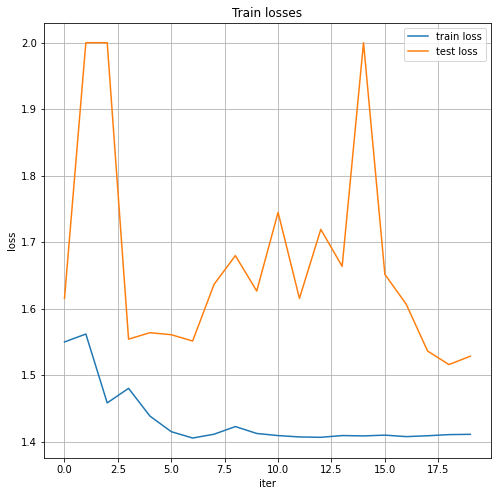

In [104]:
#criterion = get_criterion(train_ds, 'kl', device, gamma=1.4)
criterion = get_criterion(train_ds, 'ce', device, gamma=1)
model = EfficientNetASR('b1', aug_prob=0).to(device)
#model = CNN_blstm().to(device)
model = train_per_chunk(model, 
                        train_dl, dev_dl,  # egs_list=['028_2016-04-06_Nottingham']
                        epochs=20, 
                        lr=1e-4,
                        weight_decay=1e-6, 
                        gamma=0.98,
                        device=device, 
                        criterion=criterion)
torch.save(model, 'models/it3/effnet.tmp2.pt')
# train= val=0.01172. btz=40, epochs=60, lr=1e-4
# train= val=0.01155. btz=128, epochs=60, lr=1e-4
# train= val=. btz=128, epochs=60, lr=1e-3
# train= val=. btz=128, epochs=60, lr=1e-5
# mse^2 train= val=0.01417. btz=128, epochs=60, lr=1e-3


In [ ]:
# criterion = get_criterion(train_cls_ds, 'focal', device)
# model = EfficientNetASR('b1').to(device)
# #model = CNN_blstm().to(device)
# model = train_per_chunk(model, 
#                         train_dl, test_dl,  # egs_list=['028_2016-04-06_Nottingham']
#                         epochs=200, 
#                         lr=1e-4,
#                         weight_decay=1e-6, 
#                         gamma=1,
#                         device=device, 
#                         criterion=criterion)
# torch.save(model, 'models/it2/effnet.focal.pt')

In [ ]:
model = torch.load('models/model.best.pt')

In [109]:
loss, cr, conf = eval_cls(model, train_dl, device=device)
print("!!!TRAIN!!!")
print(f'{loss=}')
print(cr)
print(conf)

!!!TRAIN!!!
loss=0.795236727493441
              precision    recall  f1-score   support

          l1       0.00      0.00      0.00       588
          l2       0.03      0.00      0.00      3977
          l3       0.45      0.96      0.61     20583
          l4       0.10      0.00      0.01     17158
          l5       0.00      0.00      0.00      2575

    accuracy                           0.44     44881
   macro avg       0.12      0.19      0.12     44881
weighted avg       0.25      0.44      0.29     44881

[[    0     1   586     1     0]
 [    0     1  3965    11     0]
 [    0    29 19838   716     0]
 [    0     5 17072    81     0]
 [    0     0  2566     9     0]]


/mnt/hdd/mitrofanov-aa/project/study/anaconda/envs/sr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/hdd/mitrofanov-aa/project/study/anaconda/envs/sr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/hdd/mitrofanov-aa/project/study/anaconda/envs/sr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [106]:
loss, cr, conf = eval_cls(model, dev_dl, device=device)
print(f'{loss=}')
print(cr)
print(conf)

loss=1.0193263969318134
              precision    recall  f1-score   support

          l1       0.00      0.00      0.00        98
          l2       0.00      0.00      0.00       847
          l3       0.42      1.00      0.59      6852
          l4       0.46      0.01      0.01      5109
          l5       0.00      0.00      0.00      3319

    accuracy                           0.42     16225
   macro avg       0.18      0.20      0.12     16225
weighted avg       0.32      0.42      0.25     16225

[[   0    0   91    7    0]
 [   0    0  841    6    0]
 [   0    0 6833   19    0]
 [   0    1 5080   28    0]
 [   0    0 3318    1    0]]


/mnt/hdd/mitrofanov-aa/project/study/anaconda/envs/sr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/hdd/mitrofanov-aa/project/study/anaconda/envs/sr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/hdd/mitrofanov-aa/project/study/anaconda/envs/sr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [107]:
#model = torch.load('models/it3/effnet.tmp.pt')

loss, cr, conf = eval_cls(model, test_dl, device=device)
print(f'{loss=}')
print(cr)
print(conf)

loss=0.9131627735190504
              precision    recall  f1-score   support

          l1       0.00      0.00      0.00        87
          l2       0.00      0.00      0.00       585
          l3       0.41      0.96      0.58      3398
          l4       0.25      0.02      0.03      3465
          l5       0.00      0.00      0.00       555

    accuracy                           0.41      8090
   macro avg       0.13      0.19      0.12      8090
weighted avg       0.28      0.41      0.25      8090

[[   0    0   80    7    0]
 [   0    0  584    1    0]
 [   0    8 3251  139    0]
 [   0    0 3412   53    0]
 [   0    0  546    9    0]]


/mnt/hdd/mitrofanov-aa/project/study/anaconda/envs/sr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/hdd/mitrofanov-aa/project/study/anaconda/envs/sr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/hdd/mitrofanov-aa/project/study/anaconda/envs/sr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [108]:

model = torch.load('models/model.best.pt')
loss, cr, conf = eval_cls(model, test_dl, device=device)
print(f'{loss=}')
print(cr)
print(conf)
# 0.013951944429427385

loss=0.9183641686214237
              precision    recall  f1-score   support

          l1       0.00      0.00      0.00        87
          l2       0.00      0.00      0.00       585
          l3       0.41      0.96      0.58      3398
          l4       0.12      0.01      0.01      3465
          l5       0.00      0.00      0.00       555

    accuracy                           0.41      8090
   macro avg       0.11      0.19      0.12      8090
weighted avg       0.23      0.41      0.25      8090

[[   0    0   80    7    0]
 [   0    0  585    0    0]
 [   0    1 3259  138    0]
 [   0    0 3444   21    0]
 [   0    0  552    3    0]]


/mnt/hdd/mitrofanov-aa/project/study/anaconda/envs/sr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/hdd/mitrofanov-aa/project/study/anaconda/envs/sr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/mnt/hdd/mitrofanov-aa/project/study/anaconda/envs/sr/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [ ]:
#for idx in random_idxes:
ipd.display(ipd.Audio(item['expert_wav'][0, :25*chk_len*16], rate=16000))